In [44]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Leer el archivo CSV
df = pd.read_csv('/content/resultados.csv')

# Mostrar las primeras filas del DataFrame
print(df.head().to_string(index=False))

           id                                                        title category_id      price currency_id condition                                                                                                            permalink                                                      thumbnail
MLA1716974100 Controlador Smart Infrarojo Universal Wifi Alexa Google Home    MLA49334   32870.00         ARS       new https://articulo.mercadolibre.com.ar/MLA-1716974100-controlador-smart-infrarojo-universal-wifi-alexa-google-home-_JM http://http2.mlstatic.com/D_961218-MLU75333861023_032024-I.jpg
MLA1267653378   Control Remoto Universal Ir Wifi Alexa Google Home By Tuya   MLA409415   12609.03         ARS       new   https://articulo.mercadolibre.com.ar/MLA-1267653378-control-remoto-universal-ir-wifi-alexa-google-home-by-tuya-_JM http://http2.mlstatic.com/D_625992-MLA70326645385_072023-I.jpg
MLA1422390067                        Broadlink Cable Sensor De Temperatura    MLA49334    8997.00   

In [ ]:
# Calcular la media y la mediana de los precios de los productos
media_precios = df.groupby('category_id')['price'].mean()
mediana_precios = df.groupby('category_id')['price'].median()

# Configurar el formato de visualización de números de punto flotante
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar la media y la mediana de los precios
print("\nMedia de precios por categoria:")
print(media_precios)
print("\nMediana de precios por categoria:")
print(mediana_precios)



Media de precios por categoria:
category_id
MLA1002     2,572,791.18
MLA126843   1,197,611.50
MLA352001     149,398.80
MLA409415      33,143.42
MLA49334       77,831.85
Name: price, dtype: float64

Mediana de precios por categoria:
category_id
MLA1002     2,229,995.35
MLA126843   1,197,611.50
MLA352001      89,899.00
MLA409415      39,000.00
MLA49334       40,520.20
Name: price, dtype: float64


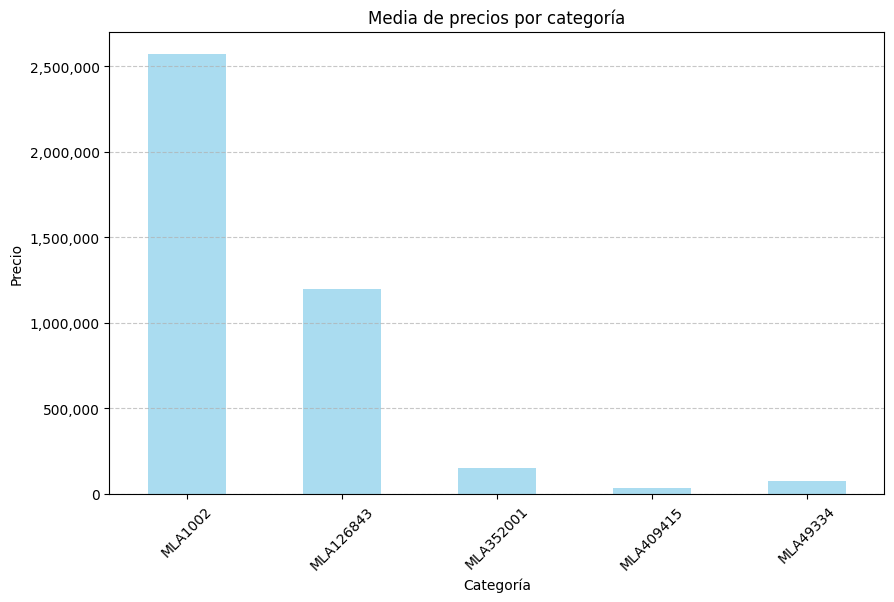

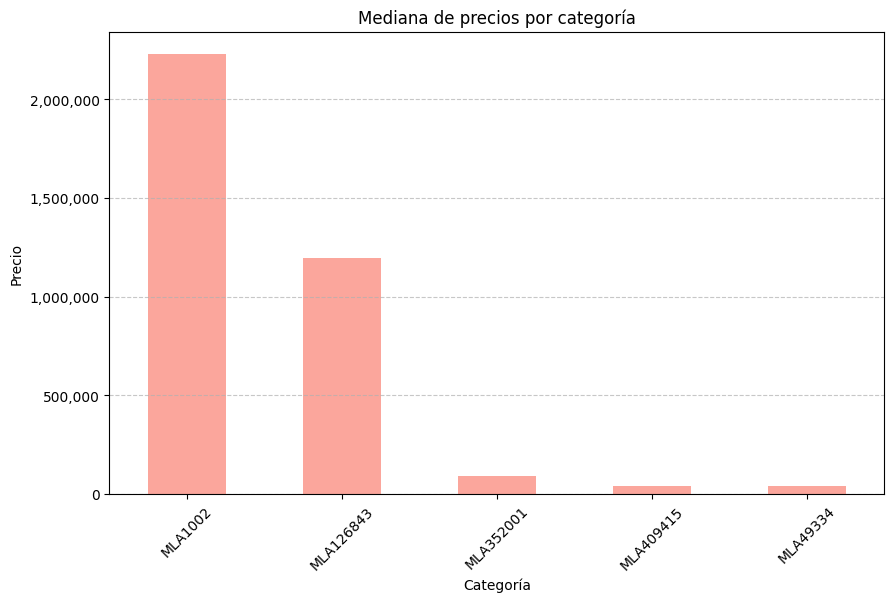

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Función para formatear los números con separadores de miles
def formato_miles(x, pos):
    return '{:,.0f}'.format(x)

# Configurar el formato de visualización de los números en el eje Y
formatter = ticker.FuncFormatter(formato_miles)

# Visualizar los datos mediante gráficos de barras
media_precios.plot(kind='bar', color='skyblue', alpha=0.7, figsize=(10, 6))
plt.title('Media de precios por categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Aplicar el formato al eje Y
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# Visualizar los datos mediante gráficos de barras
mediana_precios.plot(kind='bar', color='salmon', alpha=0.7, figsize=(10, 6))
plt.title('Mediana de precios por categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Aplicar el formato al eje Y
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

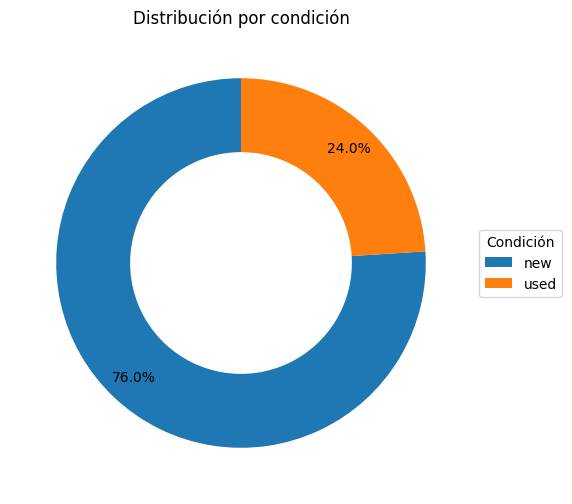

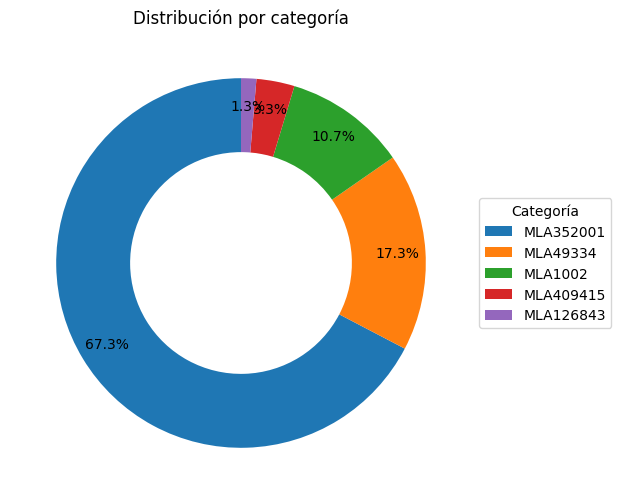

In [ ]:
# Calcular la distribución porcentual de cada condición
distribucion_condicion = df['condition'].value_counts(normalize=True) * 100

# Visualizar la distribución de productos por condición mediante un gráfico de anillo
plt.figure(figsize=(6, 6))
plt.pie(distribucion_condicion, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
plt.title('Distribución por condición')

# Añadir referencia de colores al costado
plt.legend(distribucion_condicion.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Condición')

# Mostrar el gráfico
plt.show()

# Calcular la distribución porcentual de cada categoría
distribucion_categoria = df['category_id'].value_counts(normalize=True) * 100

# Visualizar la distribución de productos por categoría mediante un gráfico de anillo
plt.figure(figsize=(6, 6))
plt.pie(distribucion_categoria, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
plt.title('Distribución por categoría')

# Añadir referencia de colores al costado
plt.legend(distribucion_categoria.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Categoría')

# Mostrar el gráfico
plt.show()

<Figure size 1000x600 with 0 Axes>

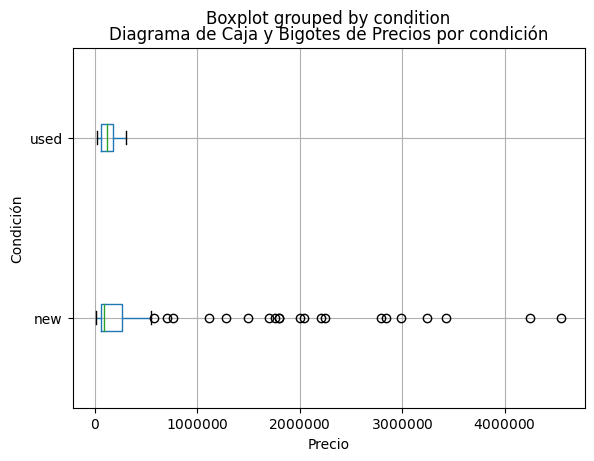

In [38]:
# Crear el diagrama de caja y bigotes
plt.figure(figsize=(10, 6))
bp = df.boxplot(column='price', by='condition', vert=False)
plt.title('Diagrama de Caja y Bigotes de Precios por condición')
plt.xlabel('Precio')
plt.ylabel('Condición')
plt.grid(True)

# Desactivar la notación científica en el eje x
bp.get_xaxis().get_major_formatter().set_scientific(False)

plt.show()

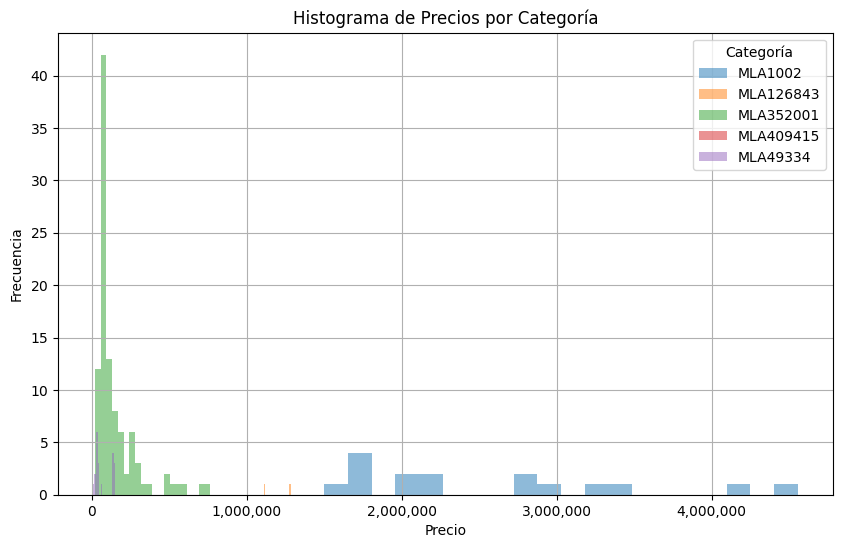

In [46]:
# Crear un histograma de precios por categoría
plt.figure(figsize=(10, 6))
for category_id, group in df.groupby('category_id'):
    plt.hist(group['price'], bins=20, alpha=0.5, label=category_id)

plt.title('Histograma de Precios por Categoría')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Formatear el eje x para evitar la notación científica
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.legend(title='Categoría')
plt.grid(True)
plt.show()